In [18]:
from imutils import face_utils
from imutils.video import VideoStream
import argparse
import imutils
import dlib
import cv2
import time
import pandas as pd
import random
from keras.utils.np_utils import to_categorical
import numpy as np
from PIL import Image as im
from matplotlib import pyplot as plt

2021-11-16 11:09:49.492307: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/guigxs/.local/lib/python3.9/site-packages/cv2/../../lib64:
2021-11-16 11:09:49.492370: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [36]:
base_string = "253 252 252 250 255 222 137 116 102 71 117 184 174 128 120 123 137 142 165 171 177 182 190 183 181 182 180 177 182 189 187 178 187 196 204 200 197 189 136 52 49 68 67 74 115 115 122 173 253 254 253 253 246 177 118 109 87 85 154 189 157 129 116 139 155 167 171 183 183 185 187 184 182 184 184 186 185 189 190 189 193 200 201 202 202 201 176 91 57 75 81 83 106 132 108 159 253 253 253 255 224 139 108 101 87 121 168 180 147 128 133 151 163 174 182 183 178 177 182 184 187 193 192 192 189 195 196 204 206 207 205 206 204 209 203 142 73 71 100 86 106 145 120 135 253 254 253 250 190 123 126 103 89 145 174 171 133 135 153 166 184 183 193 188 186 188 186 184 189 189 194 198 202 200 206 215 217 216 207 208 204 207 210 180 88 78 122 104 110 143 139 133 253 252 255 224 153 144 137 93 108 168 177 153 137 151 166 188 193 199 203 192 187 191 195 194 191 187 194 200 206 206 213 218 223 223 215 207 209 207 211 199 115 85 143 123 109 149 150 138 252 252 251 186 156 162 112 90 146 173 169 140 137 167 191 195 193 200 203 194 186 188 189 189 191 190 199 202 207 209 216 216 223 225 223 214 211 208 210 212 159 82 149 142 114 153 155 138 252 254 235 180 174 164 122 114 147 174 163 132 153 185 194 195 196 202 206 202 196 195 192 191 192 191 200 203 208 210 219 223 226 222 222 217 216 208 205 214 190 105 147 158 119 154 165 145 251 254 211 177 170 165 134 110 140 178 157 163 186 189 195 199 198 203 204 200 197 190 197 191 196 198 201 204 207 214 219 225 223 221 223 222 218 213 207 208 209 133 140 169 128 153 172 153 253 248 194 169 164 159 113 114 154 180 160 194 194 199 202 197 201 203 199 197 196 192 196 196 198 201 198 203 204 215 218 221 223 221 224 225 223 215 212 208 216 170 143 171 125 155 168 165 255 242 184 162 151 136 111 140 184 177 164 205 208 202 202 198 199 198 200 202 201 194 196 192 193 197 196 195 207 214 219 222 222 222 223 226 223 223 218 217 219 193 153 176 126 150 165 168 255 236 189 148 150 141 135 169 219 175 168 215 208 201 200 204 202 202 198 194 195 195 194 189 192 199 196 197 214 217 219 226 225 225 224 227 225 225 221 224 222 205 158 180 137 135 167 165 255 239 182 119 144 136 151 198 236 189 193 219 207 203 203 203 201 200 198 195 192 196 196 190 194 199 199 206 217 220 225 225 219 220 224 227 224 223 226 227 223 217 176 166 156 125 163 161 255 245 168 89 130 148 174 214 228 206 209 211 200 200 200 200 200 201 199 202 191 193 196 194 193 199 202 206 212 217 225 224 221 222 222 224 224 222 223 226 226 224 201 162 163 126 146 151 252 251 174 67 118 167 179 222 224 215 215 205 195 199 198 198 199 197 199 198 199 198 196 197 199 200 204 206 206 207 210 213 210 210 215 223 225 224 224 225 225 220 209 184 167 137 131 152 252 255 204 79 106 172 186 223 224 216 211 196 183 186 184 181 188 190 195 193 195 193 193 196 200 203 202 190 169 144 127 129 133 159 179 195 211 223 225 225 224 219 213 201 199 150 128 137 252 255 225 127 118 189 186 225 222 214 203 179 152 137 114 112 137 156 175 181 190 189 191 198 202 199 187 157 135 122 112 115 123 134 141 155 187 205 221 222 223 227 216 218 220 182 146 142 251 255 224 157 157 180 183 226 221 192 167 128 103 96 106 124 132 140 145 154 178 182 190 202 205 198 178 170 163 162 175 188 187 185 192 193 200 202 212 222 221 226 217 214 225 198 194 186 251 255 231 130 167 193 199 224 211 184 153 137 154 178 190 188 169 149 141 167 181 184 191 207 217 208 198 169 172 164 163 177 186 197 210 220 215 209 211 223 225 226 219 210 222 214 207 210 253 253 253 155 147 218 219 218 197 184 175 187 198 181 146 116 102 102 113 146 189 194 194 210 231 231 189 113 122 122 109 60 84 124 141 190 225 211 213 219 223 223 219 212 215 209 210 213 252 250 255 202 167 232 219 219 198 185 200 187 124 89 74 35 42 75 71 100 180 187 187 204 226 239 175 66 83 132 140 82 103 135 118 105 188 203 207 224 221 219 216 214 223 220 219 219 253 252 254 240 204 227 211 216 215 202 195 99 82 121 112 101 102 91 99 148 178 171 170 191 222 228 208 144 112 154 166 169 182 207 206 168 162 195 213 223 221 219 219 212 213 231 224 221 253 253 252 255 217 223 216 216 210 191 148 134 178 179 168 153 117 87 119 166 176 160 170 197 217 222 213 190 126 110 148 171 190 200 195 190 208 220 226 224 221 225 222 207 218 231 221 218 253 253 252 255 224 222 222 211 210 198 185 193 185 178 169 140 108 119 162 165 165 171 169 199 217 220 218 214 190 147 140 160 166 167 181 202 212 217 224 228 220 221 222 212 217 230 207 209 253 253 252 254 229 228 224 216 216 202 193 183 161 144 142 141 136 161 163 164 186 192 172 196 211 214 220 219 212 194 177 180 188 190 196 210 220 219 223 223 222 218 221 210 219 232 205 209 253 253 252 254 233 225 225 217 204 205 202 194 174 155 149 144 155 179 190 205 210 181 162 187 195 216 221 223 218 196 190 191 198 195 196 214 224 221 219 224 224 221 218 204 220 234 215 201 252 252 252 253 240 229 222 208 194 205 215 199 192 183 164 165 179 187 180 187 217 184 165 179 195 217 219 184 160 171 183 191 197 193 198 218 224 222 222 222 225 222 215 198 219 233 196 199 253 253 253 255 241 229 220 206 196 203 219 204 196 186 175 178 170 144 131 165 204 180 158 175 198 211 200 194 123 119 153 172 186 195 203 222 230 229 223 220 225 225 215 192 217 228 201 198 254 254 254 253 250 239 219 204 190 206 219 200 201 196 179 162 125 108 174 174 190 179 169 187 215 211 201 225 169 85 117 146 162 181 200 223 228 228 226 221 225 227 218 196 216 223 210 187 254 254 254 253 251 244 223 204 196 207 209 190 198 188 162 125 88 131 184 198 198 175 171 185 211 220 220 212 181 105 89 123 142 165 193 213 224 223 224 226 224 225 216 207 219 236 213 194 253 253 253 253 250 241 226 207 201 199 193 181 177 169 145 101 91 159 161 155 171 156 151 177 206 210 176 173 187 145 94 93 127 151 177 199 212 215 219 225 223 223 216 212 224 229 231 210 253 253 253 253 250 238 229 207 201 196 187 171 167 160 133 90 115 162 175 153 144 153 146 154 179 174 173 190 197 173 146 132 119 133 157 184 199 205 207 216 221 221 219 216 236 232 229 208 254 254 254 254 253 241 234 213 202 195 179 166 161 151 112 101 156 164 176 170 146 173 184 176 176 196 194 191 206 195 166 172 178 134 138 161 192 205 186 207 218 220 219 215 237 234 228 178 253 253 253 253 254 248 233 218 203 192 173 162 155 133 99 156 175 180 187 178 166 178 203 189 202 204 199 208 205 200 154 178 211 179 149 150 189 207 165 194 214 217 220 218 238 238 236 180 254 254 254 253 254 252 237 220 204 188 175 164 153 106 121 181 177 189 179 181 185 176 199 189 207 209 200 213 210 186 155 165 207 211 175 148 194 202 148 188 210 213 221 222 238 236 236 206 254 254 254 254 254 254 241 221 203 192 175 166 154 110 161 182 174 159 156 161 182 162 154 187 182 192 203 209 187 111 61 54 132 208 207 163 197 199 150 187 204 217 225 231 239 235 239 221 254 254 254 254 254 255 242 222 203 196 178 169 156 140 193 181 116 60 62 77 143 162 166 179 187 213 184 137 93 49 46 67 84 147 225 188 210 203 167 192 206 221 229 231 239 236 238 233 254 254 254 254 254 255 244 227 207 193 180 173 165 160 201 148 75 72 45 31 39 73 106 125 121 115 105 115 131 155 165 129 107 126 224 208 220 207 198 210 217 224 226 231 238 236 232 235 254 254 254 253 253 253 250 234 214 194 179 171 166 175 207 122 83 151 166 136 117 127 127 121 129 146 175 203 219 223 202 159 118 144 222 220 221 208 215 218 223 230 222 234 236 237 230 232 254 254 254 254 254 254 254 243 224 201 179 169 168 191 212 119 88 176 191 177 167 172 168 163 176 191 199 205 215 220 208 188 139 150 217 221 228 222 217 215 224 229 223 234 238 236 222 236 253 253 253 253 253 253 254 246 227 207 195 181 177 198 207 123 103 179 189 174 167 166 165 172 195 205 210 217 212 219 212 203 147 157 206 218 219 225 219 218 224 226 232 235 235 222 209 241 253 253 253 253 253 253 253 254 234 213 205 193 188 184 191 141 116 173 185 181 182 186 192 189 182 203 216 219 217 217 216 205 168 179 198 220 216 220 221 228 223 226 233 233 230 206 215 241 254 254 254 254 254 254 252 255 245 224 211 188 178 173 181 156 143 169 178 199 207 210 210 187 169 200 207 213 211 208 216 211 207 206 207 214 222 222 220 227 232 226 226 227 211 204 233 235 253 253 253 253 253 253 253 254 253 239 215 183 173 179 178 175 166 165 185 190 174 175 177 169 183 192 190 189 205 209 213 221 222 228 221 208 222 218 220 224 229 226 222 210 194 220 234 230 254 254 254 254 254 254 253 254 254 249 213 183 175 177 183 189 174 170 185 173 164 168 167 186 177 173 175 181 194 223 200 214 236 240 230 210 220 222 214 224 222 227 214 191 204 232 230 230 254 254 254 254 254 254 254 253 254 241 221 211 202 198 213 208 175 188 204 192 193 168 179 201 178 173 177 177 183 221 212 209 234 241 231 216 213 226 212 222 222 216 191 192 227 232 229 229 254 254 254 254 254 254 253 253 251 232 237 245 218 208 229 203 195 206 195 198 179 169 177 191 192 180 183 183 192 206 219 207 226 243 235 224 216 221 211 218 212 198 186 222 233 231 230 229 254 254 254 254 254 254 253 255 246 230 245 253 232 213 225 201 210 208 198 199 161 161 177 176 201 177 165 186 189 201 218 215 225 241 235 226 222 222 213 211 205 185 215 234 231 231 230 231 254 254 254 253 253 253 252 247 236 231 251 244 233 230 218 208 215 208 199 196 164 148 178 169 195 182 164 186 190 201 207 216 229 235 232 227 224 224 212 194 191 210 235 231 231 231 230 231"
base_array = np.fromstring(base_string, sep=' ')
shaped_array = base_array.reshape((48, 48))
shaped_array

array([[253., 252., 252., ..., 115., 122., 173.],
       [253., 254., 253., ..., 132., 108., 159.],
       [253., 253., 253., ..., 145., 120., 135.],
       ...,
       [254., 254., 254., ..., 231., 230., 229.],
       [254., 254., 254., ..., 231., 230., 231.],
       [254., 254., 254., ..., 231., 230., 231.]])

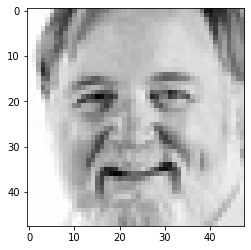

In [37]:
plt.imshow(shaped_array, cmap='gist_gray')
plt.show()

In [20]:
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Sad': 4, 'Surprise': 5, 'Neutral': 6}

def emotion_count(y_train, classes):
    """
    The function re-classify picture with disgust label into angry label
    """
    emo_classcount = {}
    print ('Disgust classified as Angry')
    y_train.loc[y_train == 1] = 0
    classes.remove('Disgust')
    for new_num, _class in enumerate(classes):
        y_train.loc[(y_train == emotion[_class])] = new_num
        class_count = sum(y_train == (new_num))
        emo_classcount[_class] = (new_num, class_count)
    return y_train.values, emo_classcount

def load_data(sample_split=0.3, usage='Training', classes=['Angry','Happy'], filepath='/home/guigxs/Documents/FaceRecognition/fer20131.csv'):
    """
    The function load provided CSV dataset and further reshape, rescale the data for feeding
    """
    df = pd.read_csv(filepath)
    df = df[df.Usage == usage]
    frames = []
    classes.append('Disgust')
    for _class in classes:
        class_df = df[df['emotion'] == emotion[_class]]
        frames.append(class_df)
    data = pd.concat(frames, axis=0)
    rows = random.sample(list(data.index), int(len(data)*sample_split))
    data = data.loc[rows]
    x = list(data["pixels"])
    X = []
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()]
        X.append(each_pixel)
    ## reshape into 48*48*1 and rescale
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)
    X = X.astype("float32")
    X /= 255
    
    y_train, new_dict = emotion_count(data.emotion, classes)
    y_train = to_categorical(y_train)
    return X, y_train

In [28]:
emo = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

X_test, y_test = load_data(sample_split=1.0, classes=emo, usage='PrivateTest')

X_train, y_train = load_data(sample_split=1.0,classes=emo, usage= 'Training')

X_val,y_val = load_data(sample_split=1.0,classes=emo, usage= 'PublicTest')


Disgust classified as Angry
Disgust classified as Angry
Disgust classified as Angry


In [24]:
def save_data(X_test, y_test, fname=''):
    """
    The function stores loaded data into numpy form for further processing
    """
    np.save( 'X_test' + fname, X_test)
    np.save( 'y_test' + fname, y_test)
save_data(X_test, y_test,"_privatetest6_100pct")
X_fname = 'X_test_privatetest6_100pct.npy'
y_fname = 'y_test_privatetest6_100pct.npy'
X = np.load(X_fname)
y = np.load(y_fname)
print ('Private test set')
y_labels = [np.argmax(lst) for lst in y]
counts = np.bincount(y_labels)
labels = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
print(zip(labels, counts))


Private test set


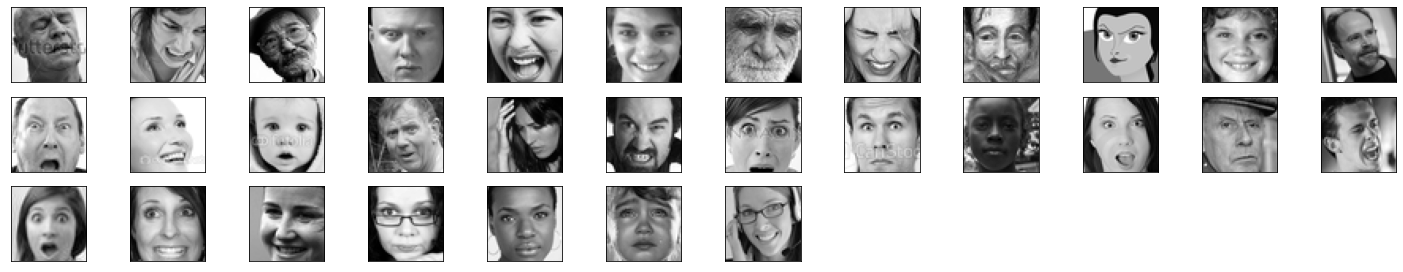

In [26]:
def overview(start, end, X):
    """
    The function is used to plot first several pictures for overviewing inputs format
    """
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
    
overview(0, 30, X)

In [30]:
y_train_labels  = [np.argmax(lst) for lst in y_train]
y_public_labels = [np.argmax(lst) for lst in y_val]
y_private_labels = [np.argmax(lst) for lst in y_test]

In [35]:
# Final Model Architecture:
from keras import layers
from keras import models
from keras import optimizers

modelN = models.Sequential()
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(6, activation='softmax'))

# optimizer:
modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')


#fit
nb_epoch = 2
batch_size = 128

modelF = modelN.fit(X_test, y_test, epochs=nb_epoch, batch_size=batch_size,
          validation_data=(X_val, y_val), shuffle=True, verbose=1)

Training....
Epoch 1/2
29/29 [==============================] - 61s 2s/step - loss: 1.7774 - accuracy: 0.2374 - val_loss: 1.7624 - val_accuracy: 0.2494
Epoch 2/2
29/29 [==============================] - 56s 2s/step - loss: 1.7672 - accuracy: 0.2449 - val_loss: 1.7636 - val_accuracy: 0.2494


[[0.16221252 0.15106861 0.22947755 0.16528033 0.11981076 0.17215025]]
Happy


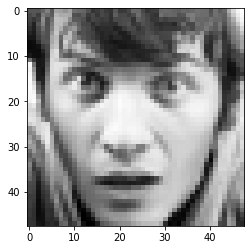

In [54]:
img = X_test[12:13]

y_prob = modelN.predict(img, batch_size=32, verbose=0)
index = np.argmax(y_prob)
print(y_prob)
print(emo[index])

plt.imshow(img[0], cmap='gist_gray')
plt.show()
